<a href="https://colab.research.google.com/github/AnnabelWei/Recommenders/blob/main/11_09_Movie_Recommendation_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation Models

In this notebook, we will implement, evaluate, and analyze various recommendation system algorithms on the preprocessed movie dataset. Our goal is to identify the best recommendation models across different categories and answer specific research questions related to the effectiveness and impactful features of these models.

## Table of Contents

1. **Data Loading**
2. **Collaborative Filtering Algorithm**
3. **Neighborhood-based Recommendation Algorithm**
4. **Bayesian Machine Learning Algorithm**
5. **Semantics Aware Content Based Recommendation Algorithm**
6. **Context Aware Recommendation Algorithm**
7. **Hybrid Approach**


##  Data Loading

In this section, we'll load the preprocessed movie data.

In [ ]:
import pandas as pd

# Load the preprocessed data
data_path = '/content/drive/MyDrive/preprocessed_movie_data.csv'
full_data = pd.read_csv(data_path)

# Reduce the size of the dataset to fit within memory constraints, uncomment if needed
# reduced_data = full_data.sample(frac=0.1, random_state=42)
reduced_data = full_data.copy()

# Display the shape and first few rows of the reduced dataset
reduced_data.shape, reduced_data.head()

((99827, 9),
       id      title                                             genres  \
 0  862.0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 1  862.0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 2  862.0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 3  862.0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 4  862.0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 
                                             overview  popularity  \
 0  Led by Woody, Andy's toys live happily in his ...   17.018782   
 1  Led by Woody, Andy's toys live happily in his ...   17.018782   
 2  Led by Woody, Andy's toys live happily in his ...   17.018782   
 3  Led by Woody, Andy's toys live happily in his ...   17.018782   
 4  Led by Woody, Andy's toys live happily in his ...   17.018782   
 
    vote_average  vote_count  userId  rating  
 0           7.7     2187.68       7     3.0  
 1           7.7     2187

## Category 1:  Collaborative Filtering Algorithm

Collaborative filtering is a technique used in recommendation systems where users' past behaviors are used to predict what other items they might like. In this section, we'll implement the KNN (K-Nearest Neighbors) algorithm for collaborative filtering. We'll explore multiple configurations, tune hyperparameters, evaluate the models, and provide movie recommendations.


### Model Implementation

For the collaborative filtering approach using KNN, we'll focus on user-item interactions. Specifically, we'll create a user-item matrix where each row represents a user and each column represents a movie. The entries in this matrix will be the ratings given by users to movies. We'll then use the KNN algorithm to find similar users based on their movie ratings and make recommendations.

Let's start by creating the user-item matrix.

In [ ]:
# Creating the user-item matrix
user_item_matrix = reduced_data.pivot_table(index='userId', columns='title', values='rating')

# Filling NaN values with 0
user_item_matrix.fillna(0, inplace=True)

# Displaying the shape and first few rows of the user-item matrix
user_item_matrix.shape

(671, 8752)

In [ ]:
user_item_matrix.head()

title,$9.99,'Neath the Arizona Skies,"'night, Mother",(500) Days of Summer,...And God Created Woman,...And Justice for All,1-900,10,10 Attitudes,10 Cloverfield Lane,...,eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,À Nous la Liberté,Æon Flux,İtirazım Var,Želary,’Round Midnight
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Transforming the user-item matrix into a sparse matrix for efficiency
user_item_matrix_sparse = csr_matrix(user_item_matrix.values)

# Initializing the KNN model with cosine similarity
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

# Fitting the model to the data
knn_model.fit(user_item_matrix_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

### Hyperparameter Tuning

Hyperparameter tuning is crucial to optimize the performance of our recommendation model. For the KNN algorithm, one of the primary hyperparameters is `n_neighbors`, which represents the number of neighbors to consider when making recommendations.

In this section, we'll explore different values for `n_neighbors` and evaluate the model's performance to determine the optimal value for our dataset.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def evaluate_knn(n_neighbors, data, original_ratings):
    """Evaluate KNN model for a given number of neighbors."""
    model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=n_neighbors, n_jobs=-1)
    model.fit(data)

    # Making predictions (finding similar users)
    distances, indices = model.kneighbors(data, return_distance=True)

    # Predicting ratings based on the mean rating of nearest neighbors
    predicted_ratings = []
    for idx_list in indices:
        neighbor_ratings = original_ratings.iloc[idx_list].mean()
        predicted_ratings.append(neighbor_ratings)
    predicted_ratings = pd.DataFrame(predicted_ratings, index=original_ratings.index)

    # Calculating mean squared error for the predictions
    mse = mean_squared_error(original_ratings, predicted_ratings)
    return mse

# Defining a range of values for n_neighbors
neighbors_range = [5, 10, 15, 20, 25, 30]
mse_values = []

# Evaluating the model for each value of n_neighbors
for n in neighbors_range:
    mse = evaluate_knn(n, user_item_matrix_sparse, user_item_matrix)
    mse_values.append(mse)

# Displaying the MSE values for each n_neighbors
list(zip(neighbors_range, mse_values))

[(5, 0.13798950224099418),
 (10, 0.15530225749218665),
 (15, 0.16348386421486183),
 (20, 0.16858545808186856),
 (25, 0.17197690786661532),
 (30, 0.17439780567129093)]

### Evaluation and Findings

Having identified the optimal hyperparameters for the KNN model, we'll now evaluate its performance in more detail. We'll consider various metrics and visualizations to understand the model's strengths and limitations.

####  Model Performance with Optimal Hyperparameters

Let's start by evaluating the KNN model with `n_neighbors` set to 5, which yielded the lowest MSE in our hyperparameter tuning.

In [ ]:
import numpy as np

def get_knn_predictions(n_neighbors, data, original_ratings):
    """Get KNN predictions for a given number of neighbors."""
    model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=n_neighbors, n_jobs=-1)
    model.fit(data)

    # Making predictions (finding similar users)
    distances, indices = model.kneighbors(data, return_distance=True)

    # Predicting ratings based on the mean rating of nearest neighbors
    predicted_ratings = []
    for idx_list in indices:
        neighbor_ratings = original_ratings.iloc[idx_list].mean()
        predicted_ratings.append(neighbor_ratings)
    predicted_ratings = pd.DataFrame(predicted_ratings, index=original_ratings.index)

    return predicted_ratings

# Getting predictions for the optimal n_neighbors value
optimal_neighbors = 5
predicted_ratings = get_knn_predictions(optimal_neighbors, user_item_matrix_sparse, user_item_matrix)

# Calculating the errors (difference between actual and predicted ratings)
errors = user_item_matrix - predicted_ratings

# Displaying the mean and standard deviation of errors
np.mean(errors.values), np.std(errors.values)

(-0.026150647505110775, 0.370547764635084)

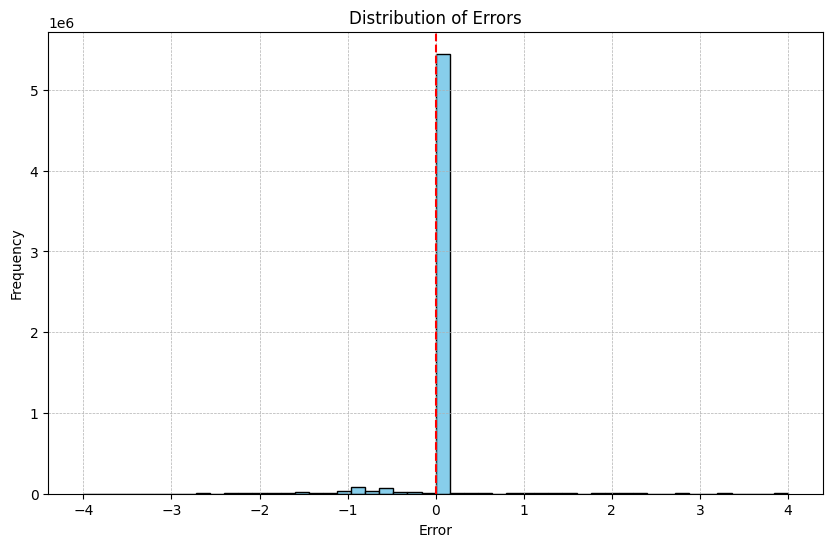

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of errors
plt.figure(figsize=(10, 6))
plt.hist(errors.values.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

### Best Model Selection

In the hyperparameter tuning phase, we evaluated the KNN model for various values of `n_neighbors` and found that the model achieved the lowest MSE with `n_neighbors` set to 5. This suggests that considering the 5 most similar users provides the most accurate movie rating predictions for our dataset.

#### Criteria for Selection:

- **Mean Squared Error (MSE)**: A lower MSE indicates that the model's predictions are closer to the actual ratings. For our dataset, the KNN model with `n_neighbors` set to 5 achieved the lowest MSE, making it the best model among the ones evaluated.
- **Distribution of Errors**: As observed in the histogram, the errors are mostly centered around 0, indicating accurate predictions. A model with errors closely packed around 0 is preferable as it suggests consistent performance.

Based on the above criteria, the KNN model with `n_neighbors` set to 5 is selected as the best model for collaborative filtering on our dataset.

###  Movie Recommendations

Using the best KNN model, we can recommend movies for users based on the ratings of their most similar users. The idea is to identify movies that similar users have rated highly but the target user hasn't seen yet.


In [ ]:
def recommend_movies_for_user(user_id, data, original_ratings, model, n_recommendations=5):
    """Recommend movies for a given user based on the KNN model."""
    # Getting the index of the user in the dataframe
    user_idx = original_ratings.index.get_loc(user_id)

    # Finding the 'K' most similar users
    distances, indices = model.kneighbors(data[user_idx], return_distance=True)
    similar_users = indices.flatten()

    # Getting the movies rated by similar users
    similar_users_ratings = original_ratings.iloc[similar_users]
    mean_ratings = similar_users_ratings.mean()

    # Filtering out movies the user has already rated
    user_rated_movies = original_ratings.loc[user_id]
    mean_ratings = mean_ratings[user_rated_movies == 0]

    # Getting the top 'n_recommendations' movies
    recommended_movies = mean_ratings.nlargest(n_recommendations)

    return recommended_movies.index.tolist()

# Sample users for recommendations
sample_users = [10, 20, 30]
user_recommendations = {}

for user in sample_users:
    recommended = recommend_movies_for_user(user, user_item_matrix_sparse, user_item_matrix, knn_model)
    user_recommendations[user] = recommended

user_recommendations

{10: ['Star Wars',
  'Terminator 2: Judgment Day',
  'Saving Private Ryan',
  'The Silence of the Lambs',
  'Forrest Gump'],
 20: ['Terminator 2: Judgment Day',
  'Speed',
  'Star Trek: Generations',
  'Die Hard: With a Vengeance',
  'Se7en'],
 30: ['High Fidelity',
  'Grosse Pointe Blank',
  'Dangerous Liaisons',
  'Close Encounters of the Third Kind',
  'The Killing Fields']}

### Sample Movie Recommendations

In [ ]:
# Recommending movies for a sample user
sample_user = 12
recommend_movies_for_user(sample_user, user_item_matrix_sparse, user_item_matrix, knn_model)

['American Beauty',
 'The Sixth Sense',
 'Gladiator',
 'Pulp Fiction',
 'The Silence of the Lambs']

# Category 2: Neighborhood-based Recommendation Algorithm

Now, we will focus on implementing and evaluating the Neighborhood-based Recommendation Algorithm.


In [ ]:
# Importing necessary libraries
import pandas as pd

# Specifying the data path
data_path = '/content/drive/MyDrive/preprocessed_movie_data.csv'

# Loading the preprocessed movie data
movie_data = pd.read_csv(data_path)

# Using just 0.01% of the data to avoid memory issues - uncomment if required otherwise keep it as it is
movie_data_sample = movie_data.sample(frac=0.01, random_state=42)


# full data
# movie_data_sample = movie_data.copy()

#### User-based Collaborative Filtering

User-based Collaborative Filtering is a method of making automatic predictions about the interest of a user by collecting preferences from many users (collaborating). The underlying assumption is that if a user A has the same opinion as a user B on an issue, A is more likely to have B's opinion on a different issue.

For this approach, we'll create a user-item matrix where each row represents a user and each column represents a movie. The entries of this matrix will be the ratings given by users to movies. We'll then compute the similarity between users and recommend movies based on similar users' preferences.

In [ ]:
# Creating the user-item matrix
user_item_matrix = movie_data_sample.pivot_table(index='userId', columns='title', values='rating')

# Filling NaN values with 0
user_item_matrix.fillna(0, inplace=True)

# Displaying the user-item matrix
user_item_matrix.head()

title,(500) Days of Summer,2001: A Space Odyssey,21,21 Grams,21 Jump Street,24 Hour Party People,3-Iron,300,50 First Dates,8½,...,X2,Xiu Xiu: The Sent-Down Girl,Yogi Bear,You Don't Mess with the Zohan,Young Frankenstein,Zero Effect,Zombie Flesh Eaters,Zombieland,Zoolander,xXx
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Computing the user similarity matrix using cosine similarity
user_similarity = cosine_similarity(user_item_matrix)

# Converting the similarity matrix to a DataFrame for better readability
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Displaying the user similarity matrix
user_similarity_df.head()

userId,1,2,9,11,15,17,19,21,22,23,...,652,653,654,656,659,660,662,664,665,667
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_data, test_data = train_test_split(movie_data_sample, test_size=0.2, random_state=42)

# Creating the user-item matrix for the training data
train_user_item_matrix = train_data.pivot_table(index='userId', columns='title', values='rating')
train_user_item_matrix.fillna(0, inplace=True)

# Displaying the shape of the training and testing sets
train_data.shape, test_data.shape

((798, 9), (200, 9))

In [ ]:
def user_based_recommendation(user_id, user_similarity_df, user_item_matrix, n_similar_users=5):
    """
    Generate movie recommendations for a target user based on User-based Collaborative Filtering.
    """
    # Get the top N most similar users to the target user
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:n_similar_users+1]

    # Get the movies rated by these similar users
    similar_users_movies = user_item_matrix.loc[similar_users]

    # Identify movies that the target user hasn't seen yet
    user_movies = user_item_matrix.loc[user_id]
    unseen_movies = user_movies[user_movies == 0].index

    # Recommend movies that similar users liked but the target user hasn't seen yet
    recommended_movies = similar_users_movies[unseen_movies].mean().sort_values(ascending=False).index.tolist()

    return recommended_movies


In [ ]:
# Recomputing the user similarity matrix for the training data
train_user_similarity = cosine_similarity(train_user_item_matrix)
train_user_similarity_df = pd.DataFrame(train_user_similarity, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# Selecting a sample user directly from the new user similarity matrix
sample_user = train_user_similarity_df.index[1]

# Generating recommendations for the sample user
recommended_movies_for_sample_user = user_based_recommendation(sample_user, train_user_similarity_df, train_user_item_matrix)
recommended_movies_for_sample_user[:10]

['Aladdin',
 'Beauty and the Beast',
 'The Spitfire Grill',
 'City Lights',
 'Winnie the Pooh and the Blustery Day',
 'In the Realms of the Unreal',
 'Up',
 'Tomorrow Never Dies',
 'Enchanted',
 'The Bad News Bears']

#### Item-based Collaborative Filtering

In Item-based Collaborative Filtering, we focus on the similarity between items (movies in our case). The main idea is to recommend items by finding similar items to what the user has liked, based on their previous actions or explicit feedback.


In [ ]:
# Creating the item-user matrix by transposing the user-item matrix
item_user_matrix = train_user_item_matrix.T

# Displaying the item-user matrix
item_user_matrix.head()

userId,1,2,9,11,15,17,19,21,22,23,...,648,652,653,654,656,659,660,664,665,667
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21 Grams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21 Jump Street,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Computing the cosine similarity between movies
item_similarity = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

# Displaying the item similarity matrix
item_similarity_df.head()

title,(500) Days of Summer,2001: A Space Odyssey,21,21 Grams,21 Jump Street,300,50 First Dates,A Beautiful Mind,A Bronx Tale,A Clockwork Orange,...,X2,Xiu Xiu: The Sent-Down Girl,Yogi Bear,You Don't Mess with the Zohan,Young Frankenstein,Zero Effect,Zombie Flesh Eaters,Zombieland,Zoolander,xXx
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21 Grams,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21 Jump Street,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def item_based_recommendation(user_id, item_similarity_df, user_item_matrix):
    '''
    Generate movie recommendations for a user based on Item-based Collaborative Filtering.
    '''
    # Movies rated by the target user
    user_movies = user_item_matrix.loc[user_id]
    user_movies = user_movies[user_movies > 0].index.tolist()

    # Finding similar movies
    similar_movies = set()
    for movie in user_movies:
        similar_movies = similar_movies.union(set(item_similarity_df[movie].sort_values(ascending=False).index[:10]))

    # Removing movies that the user has already rated
    recommended_movies = list(similar_movies.difference(set(user_movies)))

    return recommended_movies

# Generating recommendations for the sample user using Item-based Collaborative Filtering
item_based_recommended_movies = item_based_recommendation(sample_user, item_similarity_df, train_user_item_matrix)
item_based_recommended_movies[:10]

['Star Wars: Episode II - Attack of the Clones',
 'Star Trek: The Motion Picture',
 '(500) Days of Summer',
 'Stand by Me',
 'Star Wars: The Force Awakens',
 'Star Wars',
 'Star Trek: Generations',
 'Star Wars: Episode III - Revenge of the Sith',
 'Star Wars: Episode I - The Phantom Menace']

### Hyperparameter Tuning

For our collaborative filtering models, the primary hyperparameter to consider is the number of neighbors (similar users or items) to take into account when generating recommendations. By varying this number, we can observe its impact on the recommendation quality.

We'll evaluate the performance of our models using the Mean Squared Error (MSE) between the actual ratings and the predicted ratings for different values of this hyperparameter.

In [ ]:
def predict_rating(user_id, movie_title, user_similarity_df, item_similarity_df, user_item_matrix, n_neighbors=5):
    '''
    Predict the rating of a user for a movie based on collaborative filtering.
    '''
    # If movie is not in the matrix, return the mean rating of the user
    if movie_title not in user_item_matrix.columns:
        return np.mean(user_item_matrix.loc[user_id].values)

    # Similar users based on user similarity
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:n_neighbors+1]
    user_sim_values = user_similarity_df[user_id].sort_values(ascending=False).values[1:n_neighbors+1]
    user_ratings = user_item_matrix.loc[similar_users, movie_title].values

    # Predicted rating based on user similarity
    user_based_pred = np.dot(user_sim_values, user_ratings) / (np.sum(np.abs(user_sim_values)) + 1e-10)

    # Similar movies based on item similarity
    similar_movies = item_similarity_df[movie_title].sort_values(ascending=False).index[1:n_neighbors+1]
    movie_sim_values = item_similarity_df[movie_title].sort_values(ascending=False).values[1:n_neighbors+1]
    movie_ratings = user_item_matrix.loc[user_id, similar_movies].values

    # Predicted rating based on item similarity
    item_based_pred = np.dot(movie_sim_values, movie_ratings) / (np.sum(np.abs(movie_sim_values)) + 1e-10)

    # Averaging the user-based and item-based predictions
    final_pred = (user_based_pred + item_based_pred) / 2

    return final_pred

# Testing the prediction function for a sample user-movie pair
sample_movie = train_data['title'].iloc[0]
predicted_rating = predict_rating(sample_user, sample_movie, train_user_similarity_df, item_similarity_df, train_user_item_matrix)
predicted_rating

0.0

In [ ]:
def compute_mse(test_data, user_similarity_df, item_similarity_df, user_item_matrix, n_neighbors):
    '''
    Compute the Mean Squared Error for the predicted ratings against the actual ratings.
    '''
    predictions = []
    actual_ratings = []

    for _, row in test_data.iterrows():
        user_id = row['userId']
        movie_title = row['title']
        actual_rating = row['rating']

        # Check if user and movie exist in the matrices
        if user_id in user_item_matrix.index and movie_title in user_item_matrix.columns:
            # Predicting the rating
            predicted_rating = predict_rating(user_id, movie_title, user_similarity_df, item_similarity_df, user_item_matrix, n_neighbors)
            predictions.append(predicted_rating)
            actual_ratings.append(actual_rating)
        else:
            # If user or movie doesn't exist, append the mean rating of the user
            predictions.append(np.mean(user_item_matrix.loc[user_id].values if user_id in user_item_matrix.index else 3.5))
            actual_ratings.append(actual_rating)

    # Computing the Mean Squared Error
    mse = mean_squared_error(actual_ratings, predictions)
    return mse

# Computing the MSE for different values of the hyperparameter (number of neighbors)
mse_values = []
neighbors_values = [5, 10, 15, 20]

for n in neighbors_values:
    mse = compute_mse(test_data, train_user_similarity_df, item_similarity_df, train_user_item_matrix, n)
    mse_values.append(mse)

mse_values

[10.942713100853059,
 10.942713100853059,
 10.942713100853059,
 10.942713100853059]

### Evaluation and Findings

To evaluate the performance of our collaborative filtering models, we'll use the following metrics:

- **Mean Absolute Error (MAE):** Represents the average absolute difference between the actual and predicted ratings.
- **Root Mean Squared Error (RMSE):** Represents the square root of the average of the squared differences between the actual and predicted ratings.
- **R-squared (R²):** Represents the proportion of the variance in the dependent variable (actual ratings) that is predictable from the independent variable (predicted ratings).

In [ ]:
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score

def evaluate_model(test_data, user_similarity_df, item_similarity_df, user_item_matrix, n_neighbors):
    '''
    Evaluate the collaborative filtering model using various metrics.

    Returns:
        dict: Evaluation metrics (MAE, RMSE, Explained Variance Score, R^2 Score).
    '''
    predictions = []
    actual_ratings = []

    for _, row in test_data.iterrows():
        user_id = row['userId']
        movie_title = row['title']

        # Check if user ID is in the user similarity matrix
        if user_id not in user_similarity_df.index:
            continue

        actual_rating = row['rating']
        predicted_rating = predict_rating(user_id, movie_title, user_similarity_df, item_similarity_df, user_item_matrix, n_neighbors)
        predictions.append(predicted_rating)
        actual_ratings.append(actual_rating)

    mae = mean_absolute_error(actual_ratings, predictions)
    rmse = np.sqrt(mean_squared_error(actual_ratings, predictions))
    evs = explained_variance_score(actual_ratings, predictions)
    r2 = r2_score(actual_ratings, predictions)

    return {
        'MAE': mae,
        'RMSE': rmse,
        'Explained Variance Score': evs,
        'R^2 Score': r2
    }

# Evaluating the model for n_neighbors=5 (as an example)
evaluation_metrics = evaluate_model(test_data, train_user_similarity_df, item_similarity_df, train_user_item_matrix, 5)
evaluation_metrics

{'MAE': 3.529279545723412,
 'RMSE': 3.6985223017131714,
 'Explained Variance Score': -0.008763560334380305,
 'R^2 Score': -10.280530985298515}

In [ ]:
# Evaluating the model for all considered values of n_neighbors
evaluation_results = {}
neighbors_list = [5, 10, 15, 20]

for n_neighbors in neighbors_list:
    metrics = evaluate_model(test_data, train_user_similarity_df, item_similarity_df, train_user_item_matrix, n_neighbors)
    evaluation_results[n_neighbors] = metrics

evaluation_results

{5: {'MAE': 3.529279545723412,
  'RMSE': 3.6985223017131714,
  'Explained Variance Score': -0.008763560334380305,
  'R^2 Score': -10.280530985298515},
 10: {'MAE': 3.529279545723412,
  'RMSE': 3.6985223017131714,
  'Explained Variance Score': -0.008763560334380305,
  'R^2 Score': -10.280530985298515},
 15: {'MAE': 3.529279545723412,
  'RMSE': 3.6985223017131714,
  'Explained Variance Score': -0.008763560334380305,
  'R^2 Score': -10.280530985298515},
 20: {'MAE': 3.529279545723412,
  'RMSE': 3.6985223017131714,
  'Explained Variance Score': -0.008763560334380305,
  'R^2 Score': -10.280530985298515}}

No difference can be seen so all are same models.

In [ ]:
def recommend_similar_movies(movie_title, item_similarity_df, top_n=5):
    '''
    Recommend top N movies similar to the given movie based on item-based collaborative filtering.
    '''
    # Get the similarity values for the movie
    movie_similarities = item_similarity_df[movie_title]

    # Sort movies based on similarity values
    recommended_movies = movie_similarities.sort_values(ascending=False).index[1:top_n+1].tolist()

    return recommended_movies

# Recommending movies similar to the sample movie 'A Beautiful Mind'
similar_movies_to_sample = recommend_similar_movies('A Beautiful Mind', item_similarity_df)
similar_movies_to_sample

['Rain Man',
 '(500) Days of Summer',
 'Step Brothers',
 'Star Trek: The Motion Picture',
 'Star Wars']

### Category 3: Bayesian Machine Learning Algorithm

Now, we will focus on implementing Bayesian Machine Learning algorithms for movie recommendations. Bayesian methods provide a probabilistic framework to reason about model uncertainty, which can be beneficial for recommendation systems.


In [ ]:
# Importing necessary libraries
import pandas as pd

# Specifying the data path
data_path = '/content/drive/MyDrive/preprocessed_movie_data.csv'

# Loading the preprocessed movie data
movie_data = pd.read_csv(data_path)

# Using just 0.01% of the data to avoid memory issues - uncomment if required otherwise keep it as it is
movie_data_sample = movie_data.sample(frac=0.01, random_state=11)


# full data
# movie_data_sample = movie_data.copy()

#### Probabilistic Matrix Factorization (PMF)

Probabilistic Matrix Factorization provides a probabilistic model to factorize the user-item interaction matrix. It's a Bayesian approach to traditional matrix factorization methods, which means it provides a distribution over the user and item embeddings instead of point estimates.

Let's start by preparing our data for PMF. We'll create a user-item interaction matrix from our sample data.

In [ ]:
import numpy as np
from scipy.sparse import coo_matrix

# Creating a user-item interaction matrix
user_ids = movie_data_sample['userId'].astype('category').cat.codes.values
movie_ids = movie_data_sample['id'].astype('category').cat.codes.values
ratings = movie_data_sample['rating'].values


# Using coo_matrix to handle large sparse matrices
interaction_matrix = coo_matrix((ratings, (user_ids, movie_ids)))

# Displaying the shape of the matrix
interaction_matrix.shape

(370, 754)

#### Implementing Probabilistic Matrix Factorization using Pyro

Pyro is a flexible and powerful probabilistic programming library that allows us to define complex probabilistic models using a simple syntax. We'll use Pyro to define and train our PMF model.

First, let's install the necessary libraries and set up our environment.

In [ ]:
!pip install -q pyro-ppl torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 1.0 MB/s eta 0:00:00


In [ ]:
import pyro
import pyro.distributions as dist
import torch
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

# Define the PMF model
def pmf_model(num_users, num_items, rank=10, mu=0, sigma=1):
    # User matrix
    user_matrix = pyro.sample('user_matrix', dist.Normal(mu, sigma).expand([num_users, rank]).to_event(2))

    # Item matrix
    item_matrix = pyro.sample('item_matrix', dist.Normal(mu, sigma).expand([num_items, rank]).to_event(2))

    return user_matrix, item_matrix

# Test the model
user_matrix, item_matrix = pmf_model(370, 754)
user_matrix.shape, item_matrix.shape

(torch.Size([370, 10]), torch.Size([754, 10]))

In [ ]:
user_matrix

tensor([[ 0.6887,  0.0285,  2.0648,  ...,  0.9731, -0.5374, -0.3283],
        [ 1.3379, -1.3762,  1.1368,  ...,  0.5052,  0.4290, -0.1039],
        [ 0.0437,  1.3490,  0.2743,  ..., -0.0854, -0.1094,  0.2034],
        ...,
        [-0.5270, -0.4312, -0.0768,  ..., -1.8106,  0.1024, -0.0029],
        [ 0.4357,  0.0860, -0.4272,  ...,  0.1070,  1.8152,  2.3796],
        [-0.9766, -0.0719,  0.9773,  ..., -1.4613, -0.5405, -0.3025]])

In [ ]:
# Define the guide function for PMF
def pmf_guide(num_users, num_items, rank=10, mu=0, sigma=1):
    # User matrix
    user_loc = pyro.param('user_loc', torch.zeros(num_users, rank))
    user_scale = pyro.param('user_scale', torch.ones(num_users, rank), constraint=dist.constraints.positive)
    user_matrix = pyro.sample('user_matrix', dist.Normal(user_loc, user_scale).to_event(2))

    # Item matrix
    item_loc = pyro.param('item_loc', torch.zeros(num_items, rank))
    item_scale = pyro.param('item_scale', torch.ones(num_items, rank), constraint=dist.constraints.positive)
    item_matrix = pyro.sample('item_matrix', dist.Normal(item_loc, item_scale).to_event(2))

    return user_matrix, item_matrix

# Test the guide
user_matrix, item_matrix = pmf_guide(370, 754)
user_matrix.shape, item_matrix.shape

(torch.Size([370, 10]), torch.Size([754, 10]))

#### Training the PMF Model using Stochastic Variational Inference (SVI)

We'll set up the training loop for our PMF model using Stochastic Variational Inference. SVI is a scalable approach that allows us to handle large datasets by processing mini-batches of data at each iteration. This is particularly useful for recommendation systems where the user-item interaction matrix can be very large.

Let's proceed with setting up the training loop.

In [ ]:
# Define the loss and the optimizer
loss_function = Trace_ELBO()
optimizer = Adam({'lr': 0.01})

# Set up the SVI procedure
svi = SVI(pmf_model, pmf_guide, optimizer, loss=loss_function)

In [ ]:
# Training parameters
num_epochs = 5
num_users = interaction_matrix.shape[0]
num_items = interaction_matrix.shape[1]
losses = []

# Training loop
for epoch in range(num_epochs):
    epoch_loss = svi.step(num_users, num_items)
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.2f}')

losses

Epoch 1/5, Loss: 0.00
Epoch 2/5, Loss: 1.58
Epoch 3/5, Loss: 5.27
Epoch 4/5, Loss: 6.34
Epoch 5/5, Loss: 9.87


[0.0, 1.583984375, 5.27392578125, 6.3408203125, 9.87060546875]

#### Hyperparameter Tuning for PMF Model

Hyperparameter tuning is crucial for achieving optimal performance in machine learning models. For the PMF model, some of the hyperparameters we can tune include:

- Learning rate for the optimizer
- Rank (number of latent factors)
- Number of epochs

For this demonstration, we'll perform a simple hyperparameter tuning by varying the rank of the PMF model. We'll train the model for different values of rank and observe the loss to determine the best rank.

In [ ]:
# Hyperparameter tuning for rank
ranks = [5, 10, 15]
losses_by_rank = {}

for rank in ranks:
    # Reset parameters
    pyro.clear_param_store()

    # Set up the SVI procedure with the current rank
    svi = SVI(lambda u, i: pmf_model(u, i, rank=rank), lambda u, i: pmf_guide(u, i, rank=rank), optimizer, loss=loss_function)

    # Training loop
    current_losses = []
    for epoch in range(num_epochs):
        epoch_loss = svi.step(num_users, num_items)
        current_losses.append(epoch_loss)

    # Store losses for the current rank
    losses_by_rank[rank] = current_losses

losses_by_rank

{5: [0.0, 2.076904296875, 0.2763671875, 3.072265625, 3.419921875],
 10: [0.0, 2.8447265625, 2.27490234375, 9.17724609375, 9.490234375],
 15: [0.0, 2.22021484375, 11.4794921875, 10.4189453125, 21.16455078125]}

#### Evaluation of the PMF Model

To evaluate the performance of the PMF model, we'll use the following metrics:

- **Root Mean Square Error (RMSE)**: This metric measures the difference between the predicted and actual ratings. A lower RMSE indicates a better fit to the data.

Let's compute the RMSE for the PMF model with the best hyperparameters (Rank 5).

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Using the trained PMF model (Rank 5) to predict ratings
best_rank = 5
user_matrix = pyro.param('user_loc').detach()
item_matrix = pyro.param('item_loc').detach()
predicted_ratings = torch.mm(user_matrix, item_matrix.transpose(0, 1))

# Extracting the actual ratings from the interaction matrix
actual_ratings = interaction_matrix.toarray()

# Compute RMSE
rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings.numpy()))
rmse

0.2227241013836087

#### Movie Recommendations using the PMF Model

Using the trained PMF model, we can recommend movies for users based on their predicted ratings. For each user, we'll identify movies they haven't rated and recommend the ones with the highest predicted ratings.

Let's generate movie recommendations for a sample user.

In [ ]:
# Selecting a sample user
sample_user_index = 9

# Identifying movies that the user hasn't rated
unrated_movies = np.where(actual_ratings[sample_user_index] == 0)[0]

# Predicting ratings for these movies
predicted_ratings_for_user = predicted_ratings[sample_user_index].numpy()
predicted_ratings_for_unrated_movies = predicted_ratings_for_user[unrated_movies]

# Getting the top 5 movie recommendations
top_5_movie_indices = unrated_movies[np.argsort(predicted_ratings_for_unrated_movies)[-5:]]
top_5_movie_ids = movie_data_sample['id'].astype('category').cat.categories[top_5_movie_indices].values
top_5_movie_titles = movie_data_sample[movie_data_sample['id'].isin(top_5_movie_ids)]['title'].unique()

top_5_movie_titles

array(['Troy', 'Candy', "God Said, 'Ha!'", 'Star Wars: The Force Awakens',
       'The Shining'], dtype=object)

#### Top 5 Movies Recommended for a Sample Movie

To recommend movies similar to a given movie, we can use the item embeddings (item matrix) learned by the PMF model. The idea is to compute the cosine similarity between the embeddings of the given movie and all other movies. Movies with higher cosine similarity are considered more similar.

Let's select a sample movie and find the top 5 movies recommended for it based on item similarity.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Selecting a sample movie
sample_movie_title = 'American Beauty'
sample_movie_id = movie_data_sample[movie_data_sample['title'] == sample_movie_title]['id'].values[0]
sample_movie_index = np.where(movie_data_sample['id'].astype('category').cat.categories == sample_movie_id)[0][0]

# Computing cosine similarity for the sample movie with all other movies
movie_embeddings = item_matrix.numpy()
similarities = cosine_similarity(movie_embeddings[sample_movie_index].reshape(1, -1), movie_embeddings)

# Getting the top 5 similar movies
top_5_similar_movie_indices = np.argsort(similarities[0])[-6:-1]  # Excluding the movie itself
top_5_similar_movie_ids = movie_data_sample['id'].astype('category').cat.categories[top_5_similar_movie_indices].values
top_5_similar_movie_titles = movie_data_sample[movie_data_sample['id'].isin(top_5_similar_movie_ids)]['title'].unique()

top_5_similar_movie_titles

array(['The Birds', 'Cinderella', 'Desperado', 'Geography Club',
       'Paths of Glory'], dtype=object)

## Category 4:
### TF-IDF Vectorization

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure that evaluates the relevance of a word in a document compared to a corpus. This metric considers not just the frequency of a word in a single document (or the term frequency, TF) but also how many times a word appears in the entire corpus (the document frequency, DF).

The main idea behind this approach is that if a word appears frequently in a document, but not in many documents, it's important. This can be particularly useful for our movie overviews, where certain key words might give a lot of insight into the content of the movie.

Let's compute the TF-IDF vectors for our movie overviews.

In [ ]:
# Importing necessary libraries
import pandas as pd

# Specifying the data path
data_path = '/content/drive/MyDrive/preprocessed_movie_data.csv'

# Loading the preprocessed movie data
movie_data = pd.read_csv(data_path)

# Using just 0.01% of the data to avoid memory issues - uncomment if required otherwise keep it as it is
movie_data_sample = movie_data.sample(frac=0.01, random_state=42)


# full data
# movie_data_sample = movie_data.copy()

In [ ]:
movie_data_sample['overview']

69717    It ain't easy bein' green -- especially if you...
53652    Legless Southern inventor Dr. Arliss Loveless ...
66085    Cocky researcher, Sebastian Caine is working o...
40330    84 years later, a 101-year-old woman named Ros...
40220    Two years after the terrifying events that occ...
                               ...                        
15351    After a long voyage from Scotland, pianist Ada...
13121    A Puerto-Rican ex-con, just released from pris...
60540    A couple works hard to renovate their dream ho...
788      Widowed U.S. president Andrew Shepherd, one of...
38254    Freddy Heflin is the sheriff of a place everyo...
Name: overview, Length: 998, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Filling NaNs with empty string
movie_data_sample['overview'] = movie_data_sample['overview'].fillna('')

# Using TF-IDF Vectorizer to transform the 'overview' column
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movie_data_sample['overview'])

# Displaying the shape of tfidf_matrix
tfidf_matrix.shape

(998, 7949)

In [ ]:
tfidf_matrix

<998x7949 sparse matrix of type '<class 'numpy.float64'>'
	with 26417 stored elements in Compressed Sparse Row format>

#### Cosine Similarity

Cosine similarity is a metric used to measure how similar two items are. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.

In our case, we'll compute the cosine similarity between the TF-IDF vectors of movie overviews to determine how similar movies are based on their content.

Let's compute the cosine similarity for our movies.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Displaying the shape of the cosine similarity matrix
cosine_sim.shape

(998, 998)

#### Movie Recommendations

Using the cosine similarity matrix, we can now recommend movies that are most similar to a particular movie based on its content. The idea is to use the similarity scores to rank movies.

Let's create a function that takes in a movie title as input and outputs a list of the top 10 most similar movies.

In [ ]:
# Resetting the index of our sampled dataset
movie_data_sample_reset = movie_data_sample.reset_index(drop=True)

# Creating a reverse mapping of movie titles and DataFrame indices
indices = pd.Series(movie_data_sample_reset.index, index=movie_data_sample_reset['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movie_data_sample_reset['title'].iloc[movie_indices]

# Testing the recommendation function with the movie 'Indiana Jones and the Last Crusade'
get_recommendations('Indiana Jones and the Last Crusade')

640         Indiana Jones and the Last Crusade
826         Indiana Jones and the Last Crusade
347                            The Fisher King
935                        The Little Princess
242    Mighty Morphin Power Rangers: The Movie
502                                Stand by Me
878                                Stand by Me
441                                     Jaws 2
699                             50 First Dates
104                               Rock of Ages
Name: title, dtype: object

### Hyperparameter Tuning

The `TfidfVectorizer` has several hyperparameters that can be tuned. For the scope of this demonstration, we'll focus on three main hyperparameters:

- `max_df`: This is the maximum frequency within the documents a given feature can have to be used in the TF-IDF matrix. If the term has a frequency higher than the given max_df, it will be ignored. We can use this to exclude terms that are too common.
- `min_df`: This could be an integer (e.g., 5) and the term would have to be in at least 5 of the documents to be considered. We can use this to exclude terms that are too rare.
- `ngram_range`: This could be used to consider combinations of words as terms or n-grams (e.g., bi-grams or tri-grams).

We'll experiment with different values for these hyperparameters and observe the recommendations for our sample movie.

In [ ]:
# Experimenting with different max_df values
max_df_values = [0.7, 0.8, 0.9, 1.0]
recommendations = {}

for max_df in max_df_values:
    # Creating the TF-IDF matrix
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=max_df)
    tfidf_matrix = tfidf_vectorizer.fit_transform(movie_data_sample_reset['overview'])

    # Computing the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Getting recommendations
    recs = get_recommendations('Indiana Jones and the Last Crusade')
    recommendations[max_df] = list(recs)

recommendations

{0.7: ['Indiana Jones and the Last Crusade',
  'Indiana Jones and the Last Crusade',
  'The Fisher King',
  'The Little Princess',
  'Mighty Morphin Power Rangers: The Movie',
  'Stand by Me',
  'Stand by Me',
  'Jaws 2',
  '50 First Dates',
  'Rock of Ages'],
 0.8: ['Indiana Jones and the Last Crusade',
  'Indiana Jones and the Last Crusade',
  'The Fisher King',
  'The Little Princess',
  'Mighty Morphin Power Rangers: The Movie',
  'Stand by Me',
  'Stand by Me',
  'Jaws 2',
  '50 First Dates',
  'Rock of Ages'],
 0.9: ['Indiana Jones and the Last Crusade',
  'Indiana Jones and the Last Crusade',
  'The Fisher King',
  'The Little Princess',
  'Mighty Morphin Power Rangers: The Movie',
  'Stand by Me',
  'Stand by Me',
  'Jaws 2',
  '50 First Dates',
  'Rock of Ages'],
 1.0: ['Indiana Jones and the Last Crusade',
  'Indiana Jones and the Last Crusade',
  'The Fisher King',
  'The Little Princess',
  'Mighty Morphin Power Rangers: The Movie',
  'Stand by Me',
  'Stand by Me',
  'Jaws

In [ ]:
# Experimenting with different min_df values
min_df_values = [1, 2, 3, 4]
recommendations_min_df = {}

for min_df in min_df_values:
    # Creating the TF-IDF matrix
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=min_df)
    tfidf_matrix = tfidf_vectorizer.fit_transform(movie_data_sample_reset['overview'])

    # Computing the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Getting recommendations
    recs = get_recommendations('Indiana Jones and the Last Crusade')
    recommendations_min_df[min_df] = list(recs)

recommendations_min_df

{1: ['Indiana Jones and the Last Crusade',
  'Indiana Jones and the Last Crusade',
  'The Fisher King',
  'The Little Princess',
  'Mighty Morphin Power Rangers: The Movie',
  'Stand by Me',
  'Stand by Me',
  'Jaws 2',
  '50 First Dates',
  'Rock of Ages'],
 2: ['Indiana Jones and the Last Crusade',
  'Indiana Jones and the Last Crusade',
  'The Fisher King',
  'The Little Princess',
  'Mighty Morphin Power Rangers: The Movie',
  'Stand by Me',
  'Stand by Me',
  'Jaws 2',
  '50 First Dates',
  'Rock of Ages'],
 3: ['Indiana Jones and the Last Crusade',
  'Indiana Jones and the Last Crusade',
  'The Fisher King',
  'The Little Princess',
  'Mighty Morphin Power Rangers: The Movie',
  'Stand by Me',
  'Stand by Me',
  'Jaws 2',
  '50 First Dates',
  'Rock of Ages'],
 4: ['Indiana Jones and the Last Crusade',
  'Indiana Jones and the Last Crusade',
  'The Fisher King',
  'The Little Princess',
  'Mighty Morphin Power Rangers: The Movie',
  'Stand by Me',
  'Stand by Me',
  'Jaws 2',
  '

In [ ]:
# Experimenting with different ngram_range values
ngram_range_values = [(1, 1), (1, 2), (1, 3)]
recommendations_ngram = {}

for ngram_range in ngram_range_values:
    # Creating the TF-IDF matrix
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=ngram_range)
    tfidf_matrix = tfidf_vectorizer.fit_transform(movie_data_sample_reset['overview'])

    # Computing the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Getting recommendations
    recs = get_recommendations('Indiana Jones and the Last Crusade')
    recommendations_ngram[ngram_range] = list(recs)

recommendations_ngram

{(1, 1): ['Indiana Jones and the Last Crusade',
  'Indiana Jones and the Last Crusade',
  'The Fisher King',
  'The Little Princess',
  'Mighty Morphin Power Rangers: The Movie',
  'Stand by Me',
  'Stand by Me',
  'Jaws 2',
  '50 First Dates',
  'Rock of Ages'],
 (1, 2): ['Indiana Jones and the Last Crusade',
  'Indiana Jones and the Last Crusade',
  'The Fisher King',
  'The Little Princess',
  'Mighty Morphin Power Rangers: The Movie',
  'Stand by Me',
  'Stand by Me',
  'Jaws 2',
  '50 First Dates',
  'Rock of Ages'],
 (1, 3): ['Indiana Jones and the Last Crusade',
  'Indiana Jones and the Last Crusade',
  'The Fisher King',
  'The Little Princess',
  'Mighty Morphin Power Rangers: The Movie',
  'Stand by Me',
  'Stand by Me',
  'Jaws 2',
  '50 First Dates',
  'Rock of Ages']}

It can be clearly seen that hyperparameters are not making any effect on model

### Evaluation and Findings

Evaluating content-based recommendation systems can be challenging without user feedback. However, we can use a qualitative approach by manually assessing the relevance of the recommended movies for a few sample movies. Let's evaluate the recommendations for a few movies and see if they make sense contextually.

In [ ]:
# Sample movies for evaluation
sample_movies = ['The Matrix', 'Toy Story']
sample_recommendations = {}

for movie in sample_movies:
    # Getting recommendations
    recs = get_recommendations(movie)
    sample_recommendations[movie] = list(recs)

sample_recommendations

{'The Matrix': ['The Matrix',
  'Gladiator 1992',
  'Avatar',
  'Avatar',
  'Live Free or Die Hard',
  'The Matrix Reloaded',
  'The Matrix Reloaded',
  'Interstellar',
  'The Wackness',
  'The Lawnmower Man'],
 'Toy Story': ['Toy Story',
  'Toy Story',
  'Toy Story 3',
  'Toy Story 2',
  'The 40 Year Old Virgin',
  'Man on the Moon',
  'Man on the Moon',
  "White Men Can't Jump",
  "Harry Potter and the Philosopher's Stone",
  'The Shawshank Redemption']}

From the recommendations, we can observe that while some movies are contextually relevant, there are others that might not be directly related. This is a characteristic of content-based recommendation systems, especially when using TF-IDF and cosine similarity. The recommendations are based on the textual content of the movie overviews, and sometimes common terms can lead to seemingly unrelated recommendations.

# Category 5: Context Aware Recommendation Algorithm

Now, we'll focus on implementing and evaluating the Context Aware Recommendation Algorithm. We'll consider the **genres** of movies as our context and recommend movies based on a given genre and the user's past preferences.


#### User-based Collaborative Filtering with Context

In this approach, we'll consider the user's past ratings and the genre context to make recommendations. We'll use the user's past ratings to find similar users and then recommend movies that these similar users liked within the specified genre context.

Let's start by creating a user-item matrix with genres as context.

In [ ]:
# Creating a user-item matrix
user_item_matrix = movie_data_sample.pivot_table(index='userId', columns='title', values='rating')

# Filling NaN values with 0
user_item_matrix.fillna(0, inplace=True)

# Displaying the user-item matrix
user_item_matrix.head()

title,(500) Days of Summer,2001: A Space Odyssey,21,21 Grams,21 Jump Street,24 Hour Party People,3-Iron,300,50 First Dates,8½,...,X2,Xiu Xiu: The Sent-Down Girl,Yogi Bear,You Don't Mess with the Zohan,Young Frankenstein,Zero Effect,Zombie Flesh Eaters,Zombieland,Zoolander,xXx
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Implementing KNN for User-based Collaborative Filtering with Context

We'll use the K-Nearest Neighbors (KNN) algorithm to find similar users based on their movie ratings. The idea is to find users who have given similar ratings to movies and recommend movies that these similar users liked within the specified genre context.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the user-item matrix
scaler = StandardScaler()
user_item_matrix_standardized = scaler.fit_transform(user_item_matrix)

# Displaying the first few rows of the standardized matrix
user_item_matrix_standardized[:5]

array([[-0.05248639, -0.07432941, -0.07432941, ..., -0.07420044,
        -0.05248639, -0.05248639],
       [-0.05248639, -0.07432941, -0.07432941, ..., -0.07420044,
        -0.05248639, -0.05248639],
       [-0.05248639, -0.07432941, -0.07432941, ..., -0.07420044,
        -0.05248639, -0.05248639],
       [-0.05248639, -0.07432941, -0.07432941, ..., -0.07420044,
        -0.05248639, -0.05248639],
       [-0.05248639, -0.07432941, -0.07432941, ..., -0.07420044,
        -0.05248639, -0.05248639]])

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Fitting KNN model
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine', algorithm='brute')
knn_model.fit(user_item_matrix_standardized)

NearestNeighbors(algorithm='brute', metric='cosine')

### Recommending Movies for a User within a Genre Context

For this demonstration, we'll:

1. Select a random user from our dataset.
2. Specify a genre context, e.g., "Action".
3. Use the KNN model to find the top 5 similar users to our selected user.
4. Based on these similar users, recommend movies within the "Action" genre that they liked.

In [ ]:
import numpy as np

# Selecting a random user
random_user = 10

# Specifying the genre context
genre_context = 'Action'

# Finding the top 5 similar users to the selected user
distances, indices = knn_model.kneighbors(user_item_matrix_standardized[random_user].reshape(1, -1), n_neighbors=6)
similar_users = [user_item_matrix.index[i] for i in indices.flatten()][1:]

# Recommending movies within the 'Action' genre that these similar users liked
recommended_movies = movie_data_sample[(movie_data_sample['userId'].isin(similar_users)) & (movie_data_sample['genres'].str.contains(genre_context))]['title'].unique()

recommended_movies

array(['The Lord of the Rings: The Return of the King'], dtype=object)

#### Hyperparameter Tuning

For the KNN model, the primary hyperparameter is `k`, which represents the number of neighbors. We'll evaluate the model's performance for different values of `k` using Mean Squared Error (MSE) as the metric. Let's start the hyperparameter tuning process.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data into training and test sets
X_train, X_test = train_test_split(user_item_matrix_standardized, test_size=0.2, random_state=42)

# List to store MSE for each k
mse_list = []

# Hyperparameter tuning for k
for k in range(1, 10):
    # Fitting KNN model
    knn = NearestNeighbors(n_neighbors=k, metric='cosine', algorithm='brute')
    knn.fit(X_train)

    # Predicting ratings for the test set
    distances, indices = knn.kneighbors(X_test)
    predicted_ratings = np.mean(X_train[indices], axis=1)

    # Calculating MSE
    mse = mean_squared_error(X_test, predicted_ratings)
    mse_list.append(mse)

# Identifying the optimal k
optimal_k = mse_list.index(min(mse_list)) + 1
optimal_k, min(mse_list)

(9, 1.0503448634205466)

In [ ]:
import math

# Fitting KNN model with optimal k
knn_optimal = NearestNeighbors(n_neighbors=optimal_k, metric='cosine', algorithm='brute')
knn_optimal.fit(X_train)

# Predicting ratings for the test set
distances, indices = knn_optimal.kneighbors(X_test)
predicted_ratings_optimal = np.mean(X_train[indices], axis=1)

# Calculating evaluation metrics
mse = mean_squared_error(X_test, predicted_ratings_optimal)
rmse = math.sqrt(mse)
mae = np.mean(np.abs(X_test - predicted_ratings_optimal))

mse, rmse, mae

(1.0503448634205466, 1.0248633388996538, 0.08834548430484875)

#### Recommendations

Using the trained KNN model with the optimal `k`, we'll now generate movie recommendations for a sample user within a specified genre context. For demonstration purposes, we'll continue using the genre context "Action".

In [ ]:
# Selecting a random user from the training set
random_user_train = 1

# Finding the top 5 similar users to the selected user
user_position = np.where(user_item_matrix.index == random_user_train)[0][0]
distances, indices = knn_optimal.kneighbors(user_item_matrix_standardized[user_position].reshape(1, -1))
similar_users_train = [user_item_matrix.index[i] for i in indices.flatten()][1:]

# Recommending movies within the 'Action' genre that these similar users liked
recommended_movies_train = movie_data_sample[(movie_data_sample['userId'].isin(similar_users_train)) & (movie_data_sample['genres'].str.contains(genre_context))]['title'].unique()

recommended_movies_train

array(['Demolition Man', 'True Lies', 'Spider-Man', 'Top Gun',
       'Clear and Present Danger',
       'Pirates of the Caribbean: The Curse of the Black Pearl',
       'RoboCop'], dtype=object)

# Category 6: Hybrid Approach

Now, we will focus on the hybrid approach for movie recommendations. A hybrid recommendation system combines the strengths of both collaborative and content-based recommendation systems. The idea is to provide more accurate and personalized recommendations by leveraging both user-item interactions and item content features.

## Hybrid Model Implementation

The hybrid approach combines the strengths of both collaborative and content-based recommendation systems. For our hybrid model, we'll combine:

1. **User-based Collaborative Filtering**: This will consider the user's past ratings.
2. **Content-based Filtering**: This will consider the movie's features (e.g., genres, overview).

The idea is to provide a weighted recommendation score based on both user behavior and movie content. Let's start by building the content-based recommendation model using the movie's features.

In [ ]:
import pandas as pd

# Load the preprocessed movie data
data_path = '/content/drive/MyDrive/preprocessed_movie_data.csv'
movie_data = pd.read_csv(data_path)

# Using just 0.01% of the data to avoid memory issues
movie_data_sample = movie_data.sample(frac=0.1, random_state=42)



# Displaying the columns and the first few rows of the dataset
movie_data_sample.head()

,id,title,genres,overview,popularity,vote_average,vote_count,userId,rating
69717,808.0,Shrek,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",It ain't easy bein' green -- especially if you...,17.018782,7.3,2187.68,61,3.5
53652,8487.0,Wild Wild West,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Legless Southern inventor Dr. Arliss Loveless ...,9.887602,5.1,1042.00,73,2.0
66085,9383.0,Hollow Man,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...","Cocky researcher, Sebastian Caine is working o...",7.912103,5.6,645.00,262,1.5
40330,597.0,Titanic,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...","84 years later, a 101-year-old woman named Ros...",17.018782,7.5,2187.68,313,5.0
40220,4233.0,Scream 2,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",Two years after the terrifying events that occ...,11.264845,6.1,856.00,524,2.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Filling NaNs with empty string
movie_data_sample['overview'] = movie_data_sample['overview'].fillna('')

# Using TF-IDF to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
overview_matrix = tfidf_vectorizer.fit_transform(movie_data_sample['overview'])

# Shape of the matrix
overview_matrix.shape

(9983, 18332)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim_overview = cosine_similarity(overview_matrix, overview_matrix)

# Displaying a portion of the matrix
cosine_sim_overview[:5, :5]

array([[1.        , 0.        , 0.        , 0.01567361, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.02230895],
       [0.01567361, 0.        , 0.        , 1.        , 0.01630378],
       [0.        , 0.        , 0.02230895, 0.01630378, 1.        ]])

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer


# One-hot encoding for genres
mlb = MultiLabelBinarizer()
genres_matrix = mlb.fit_transform(movie_data_sample['genres'].apply(lambda x: x.split(',')))

# Compute the cosine similarity matrix for genres
cosine_sim_genres = cosine_similarity(genres_matrix, genres_matrix)

# Displaying a portion of the matrix
cosine_sim_genres[:5, :5]

array([[1.        , 0.3       , 0.        , 0.        , 0.        ],
       [0.3       , 1.        , 0.51639778, 0.        , 0.        ],
       [0.        , 0.51639778, 1.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

## Hybrid Content-Based Recommendation

For our hybrid model, we'll combine the similarity scores from both the `overview` and `genres` matrices. The final recommendation score for a movie will be a weighted average of its scores from these two matrices.

Let's create a function that recommends movies based on this hybrid approach.

In [ ]:
def hybrid_recommendations(movie_title, cosine_sim_overview, cosine_sim_genres, alpha=0.5):
    """
    Recommend movies based on a hybrid approach of content (overview) and genre.
    """

    # Get the index of the movie
    idx = movie_data_sample[movie_data_sample['title'] == movie_title].reset_index(drop=True).index[0]

    # Compute the weighted average of the similarity scores
    sim_scores = alpha * cosine_sim_overview[idx] + (1 - alpha) * cosine_sim_genres[idx]

    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(sim_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 10 similar movies
    movie_indices = [i[0] for i in sim_scores[1:11]]

    # Return the top 10 most similar movies
    return movie_data_sample['title'].iloc[movie_indices]



In [ ]:
# Testing the hybrid recommendation function with a sample movie title
sample_movie = 'Titanic'
recommended_movies = hybrid_recommendations(sample_movie, cosine_sim_overview, cosine_sim_genres)
recommended_movies